# Song Recommendation System using Content-Based Filtering

Wavelengths is a new music streaming company seeking to introduce listeners to the best possible listening experience. They are seeking help in creating a recommendation system is put into place to suggest songs based on popularity. 
For a streaming service, it is essential to keep listeners on their app and enjoying the songs they love.  Recommending songs that are similar to what the user wants to hear will likely increase streaming, leading to increased revenue and customer buy-in for the service, which is essential in today’s competitive market. 


The dataset is from <https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset>.

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn.objects as so

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [3]:
df.tail()

valence  year  acousticness  \
170648    0.608  2020       0.08460   
170649    0.734  2020       0.20600   
170650    0.637  2020       0.10100   
170651    0.195  2020       0.00998   
170652    0.642  2020       0.13200   

                                                  artists  danceability  \
170648  ['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...         0.786   
170649                                       ['Ashnikko']         0.717   
170650                                        ['MAMAMOO']         0.634   
170651                                         ['Eminem']         0.671   
170652                              ['KEVVO', 'J Balvin']         0.856   

        duration_ms  energy  explicit                      id  \
170648       301714   0.808         0  0KkIkfsLEJbrcIhYsCL7L5   
170649       150654   0.753         0  0OStKKAuXlxA0fMH54Qs6E   
170650       211280   0.858         0  4BZXVFYCb76Q0Klojq4piV   
170651       337147   0.623         1  5SiZJoLXp3WOl3J4C8IK0d   
170652       189507   0.721         1  7HmnJHfs0BkFzX4x8j0hkl   

        instrumentalness  key  liveness  loudness  mode  \
170648          0.000289    7    0.0822    -3.702     1   
170649          0.000000    7    0.1010    -6.020     1   
170650          0.000009    4    0.2580    -2.226     0   
170651          0.000008    2    0.6430    -7.161     1   
170652          0.004710    7    0.1820    -4.928     1   

                                   name  popularity release_date  speechiness  \
170648                            China          72   2020-05-29       0.0881   
170649      Halloweenie III: Seven Days          68   2020-10-23       0.0605   
170650                              AYA          76   2020-11-03       0.0809   
170651                         Darkness          70   2020-01-17       0.3080   
170652  Billetes Azules (with J Balvin)          74   2020-10-16       0.1080   

          tempo  
170648  105.029  
170649  137.936  
170650   91.688  
170651   75.055  
170652   94.991

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
df.describe()

valence           year   acousticness   danceability  \
count  170653.000000  170653.000000  170653.000000  170653.000000   
mean        0.528587    1976.787241       0.502115       0.537396   
std         0.263171      25.917853       0.376032       0.176138   
min         0.000000    1921.000000       0.000000       0.000000   
25%         0.317000    1956.000000       0.102000       0.415000   
50%         0.540000    1977.000000       0.516000       0.548000   
75%         0.747000    1999.000000       0.893000       0.668000   
max         1.000000    2020.000000       0.996000       0.988000   

        duration_ms         energy       explicit  instrumentalness  \
count  1.706530e+05  170653.000000  170653.000000     170653.000000   
mean   2.309483e+05       0.482389       0.084575          0.167010   
std    1.261184e+05       0.267646       0.278249          0.313475   
min    5.108000e+03       0.000000       0.000000          0.000000   
25%    1.698270e+05       0.255000       0.000000          0.000000   
50%    2.074670e+05       0.471000       0.000000          0.000216   
75%    2.624000e+05       0.703000       0.000000          0.102000   
max    5.403500e+06       1.000000       1.000000          1.000000   

                 key       liveness       loudness           mode  \
count  170653.000000  170653.000000  170653.000000  170653.000000   
mean        5.199844       0.205839     -11.467990       0.706902   
std         3.515094       0.174805       5.697943       0.455184   
min         0.000000       0.000000     -60.000000       0.000000   
25%         2.000000       0.098800     -14.615000       0.000000   
50%         5.000000       0.136000     -10.580000       1.000000   
75%         8.000000       0.261000      -7.183000       1.000000   
max        11.000000       1.000000       3.855000       1.000000   

          popularity    speechiness          tempo  
count  170653.000000  170653.000000  170653.000000  
mean       31.431794       0.098393     116.861590  
std        21.826615       0.162740      30.708533  
min         0.000000       0.000000       0.000000  
25%        11.000000       0.034900      93.421000  
50%        33.000000       0.045000     114.729000  
75%        48.000000       0.075600     135.537000  
max       100.000000       0.970000     243.507000

In [6]:
# remove brackets from "artists"

for index, row in df.iterrows():
    # Remove brackets from the string
    cleaned_string = row['artists'].strip("[]").strip("''")
    # Update the dataframe with the cleaned string
    df.at[index, 'artists'] = cleaned_string

df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  Sergei Rachmaninoff', 'James Levine', 'Berline...         0.279   
1                                         Dennis Day         0.819   
2  KHP Kridhamardawa Karaton Ngayogyakarta Hadini...         0.328   
3                                       Frank Parker         0.275   
4                                         Phil Regan         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

## Year

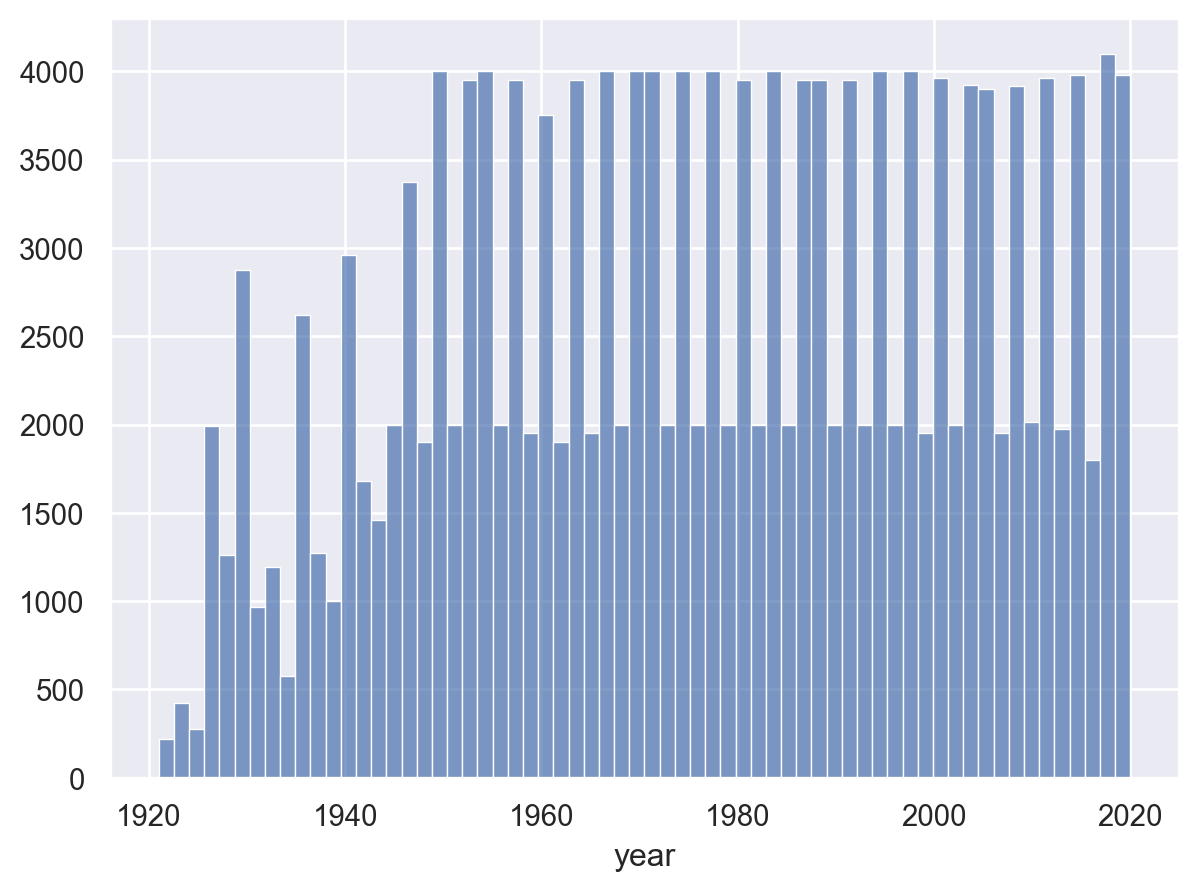

In [7]:
p = so.Plot(df, "year")
p.add(so.Bars(), so.Hist())

In [8]:
top_10_years = df["year"].value_counts(ascending=False).head(10)
print(f' The 10 years with the most releases in our dataset: \n{top_10_years}')

 The 10 years with the most releases in our dataset: 
year
2018    2103
2020    2030
2011    2017
2010    2016
2014    2005
2001    2005
1974    2000
1979    2000
1978    2000
1977    2000
Name: count, dtype: int64


## Valence

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

In [9]:
df["valence"].describe()

count    170653.000000
mean          0.528587
std           0.263171
min           0.000000
25%           0.317000
50%           0.540000
75%           0.747000
max           1.000000
Name: valence, dtype: float64

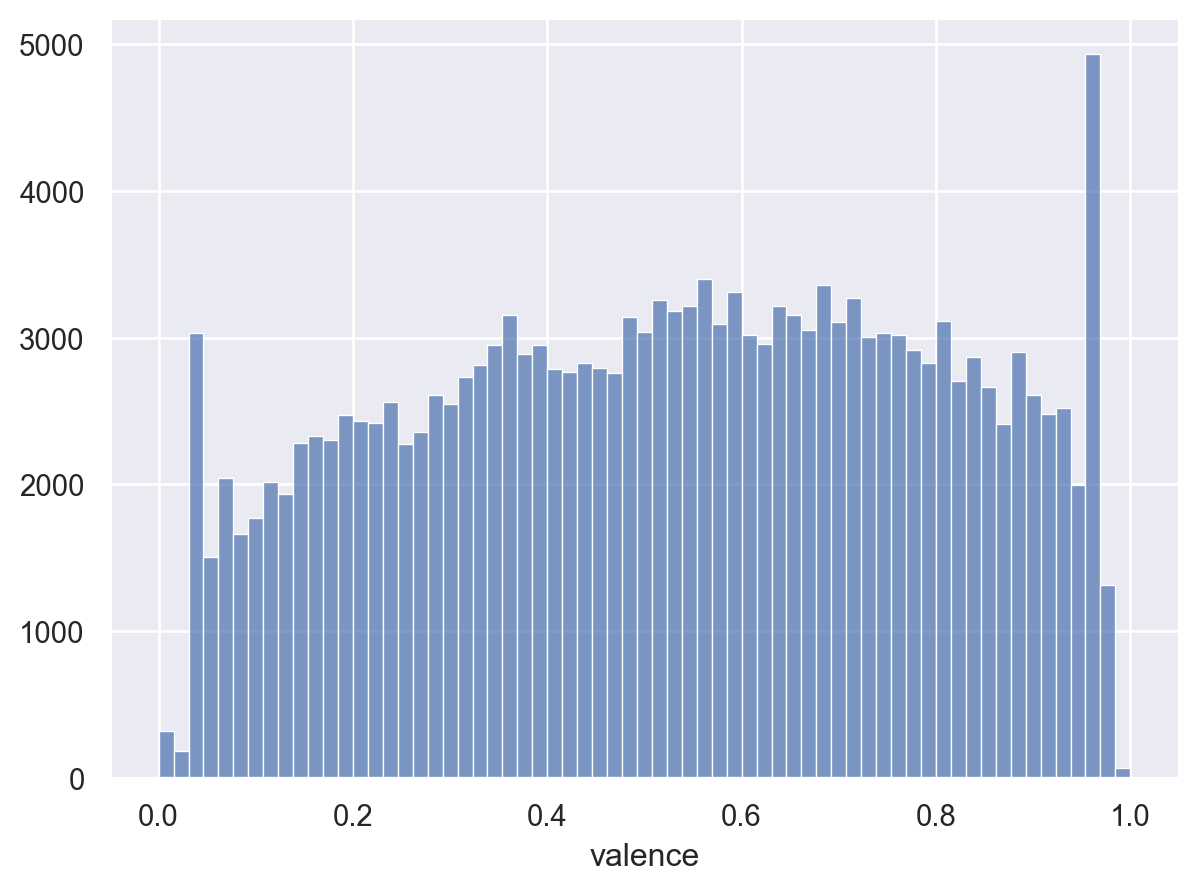

In [10]:
p = so.Plot(df, "valence")
p.add(so.Bars(), so.Hist())

## Acousticness

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

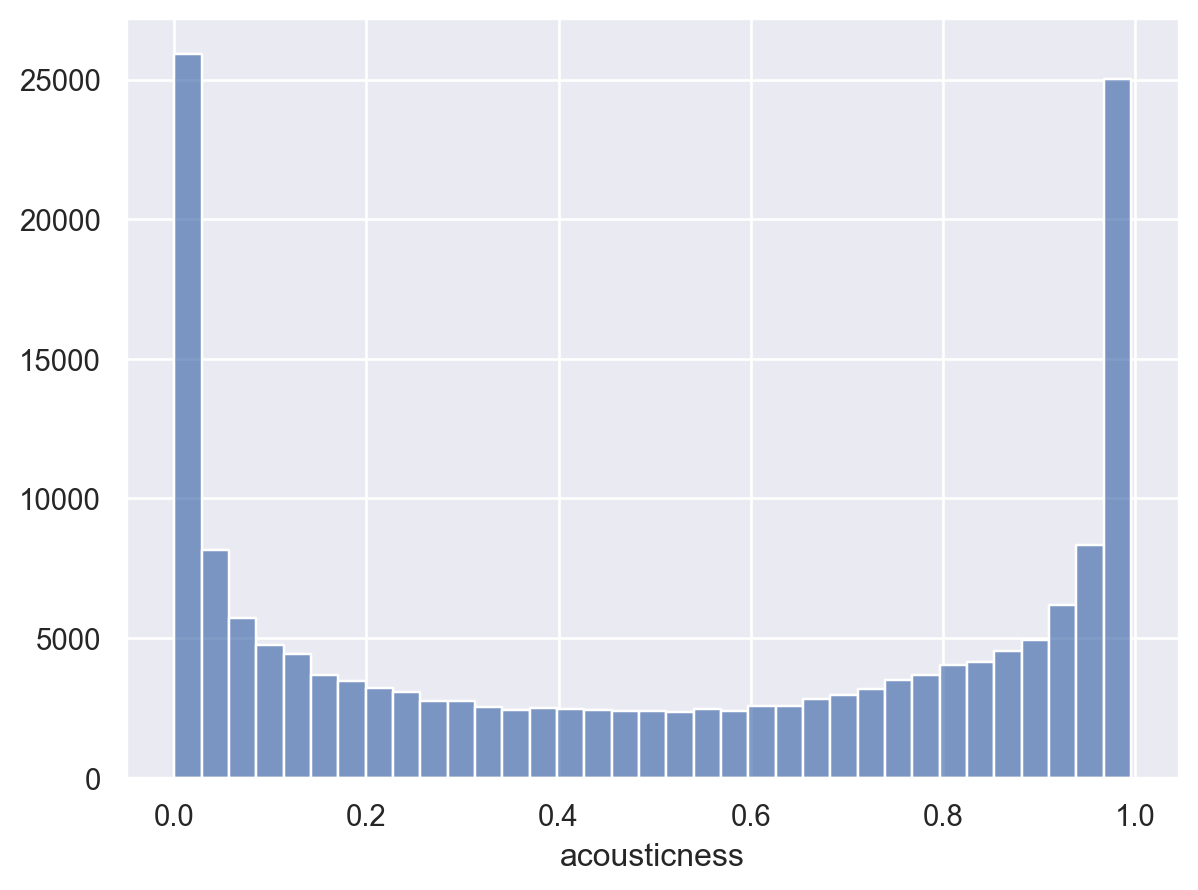

In [11]:
p = so.Plot(df, "acousticness")
p.add(so.Bars(), so.Hist())

## Song Duration

In [12]:
print(f' Average song length: {(df["duration_ms"].mean() / 60000)} minutes')
print(f' Max song length: {(df["duration_ms"].max() / 60000)} minutes')
print(f' Min song length: {(df["duration_ms"].min() / 60000)} minutes')

 Average song length: 3.8491385110917085 minutes
 Max song length: 90.05833333333334 minutes
 Min song length: 0.08513333333333334 minutes


Was going to convert the song duration column but now I'm thinking it's better to leave it in ms for purposes of modeling

## Energy

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [13]:
df["energy"].describe()

count    170653.000000
mean          0.482389
std           0.267646
min           0.000000
25%           0.255000
50%           0.471000
75%           0.703000
max           1.000000
Name: energy, dtype: float64

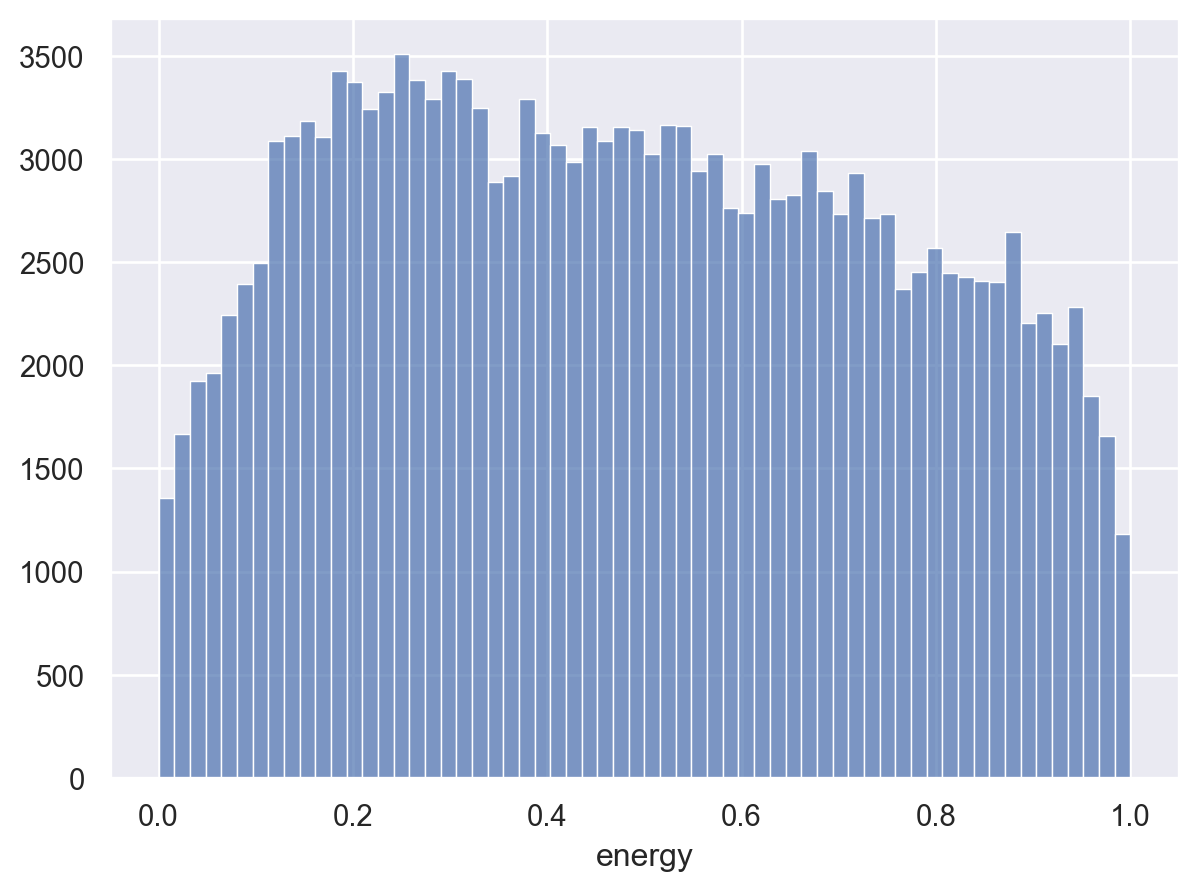

In [14]:
p = so.Plot(df, "energy")
p.add(so.Bars(), so.Hist())

## Instrumentalness

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

In [15]:
df["instrumentalness"].describe()

count    170653.000000
mean          0.167010
std           0.313475
min           0.000000
25%           0.000000
50%           0.000216
75%           0.102000
max           1.000000
Name: instrumentalness, dtype: float64

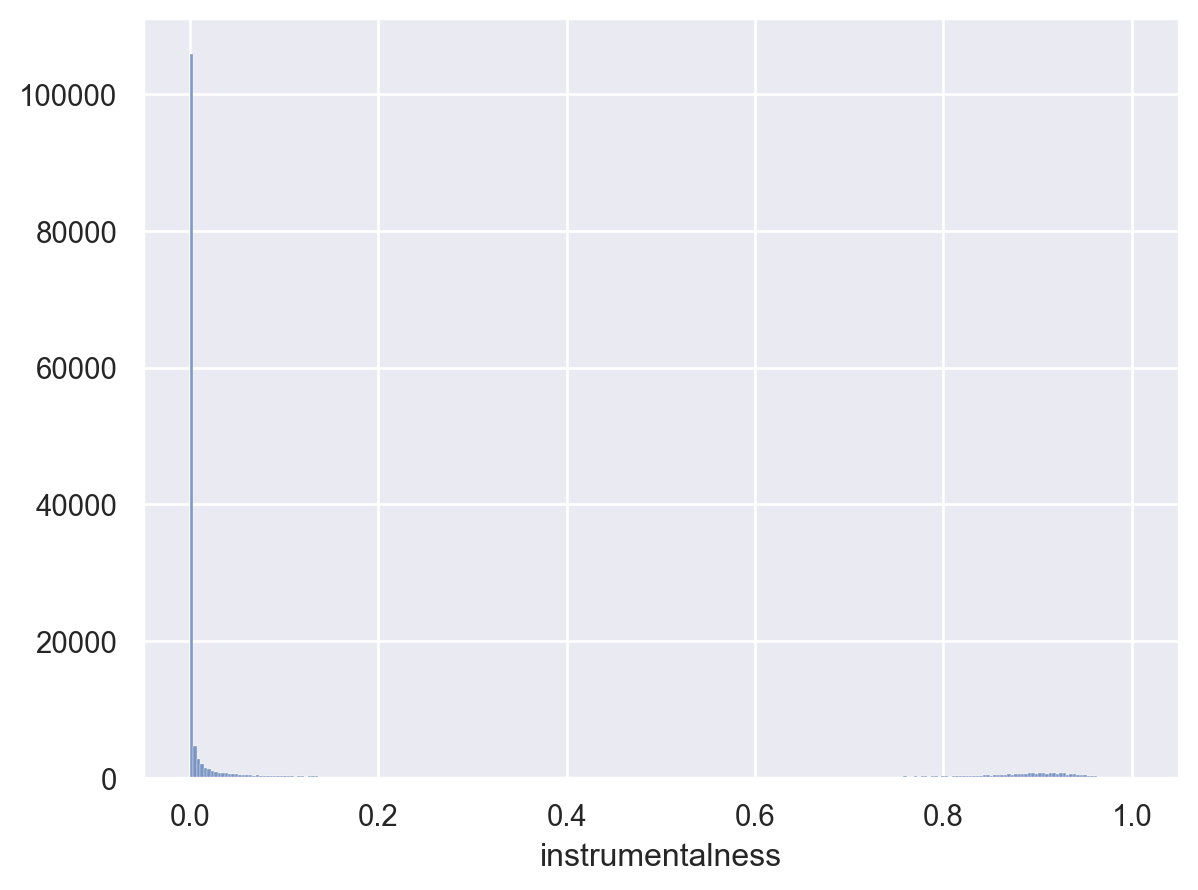

In [16]:
p = so.Plot(df, "instrumentalness")
p.add(so.Bars(), so.Hist())

In [17]:
zero_instrumentalness = df.loc[df["instrumentalness"] == 0]
print(f' Number of songs with an "instrumentalness" measure of zero: {zero_instrumentalness["id"].value_counts().sum()}')

 Number of songs with an "instrumentalness" measure of zero: 46580


## Popularity

In [18]:
df["popularity"].describe()

count    170653.000000
mean         31.431794
std          21.826615
min           0.000000
25%          11.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

In [19]:
len(df.loc[df['popularity'] == 0])

27892

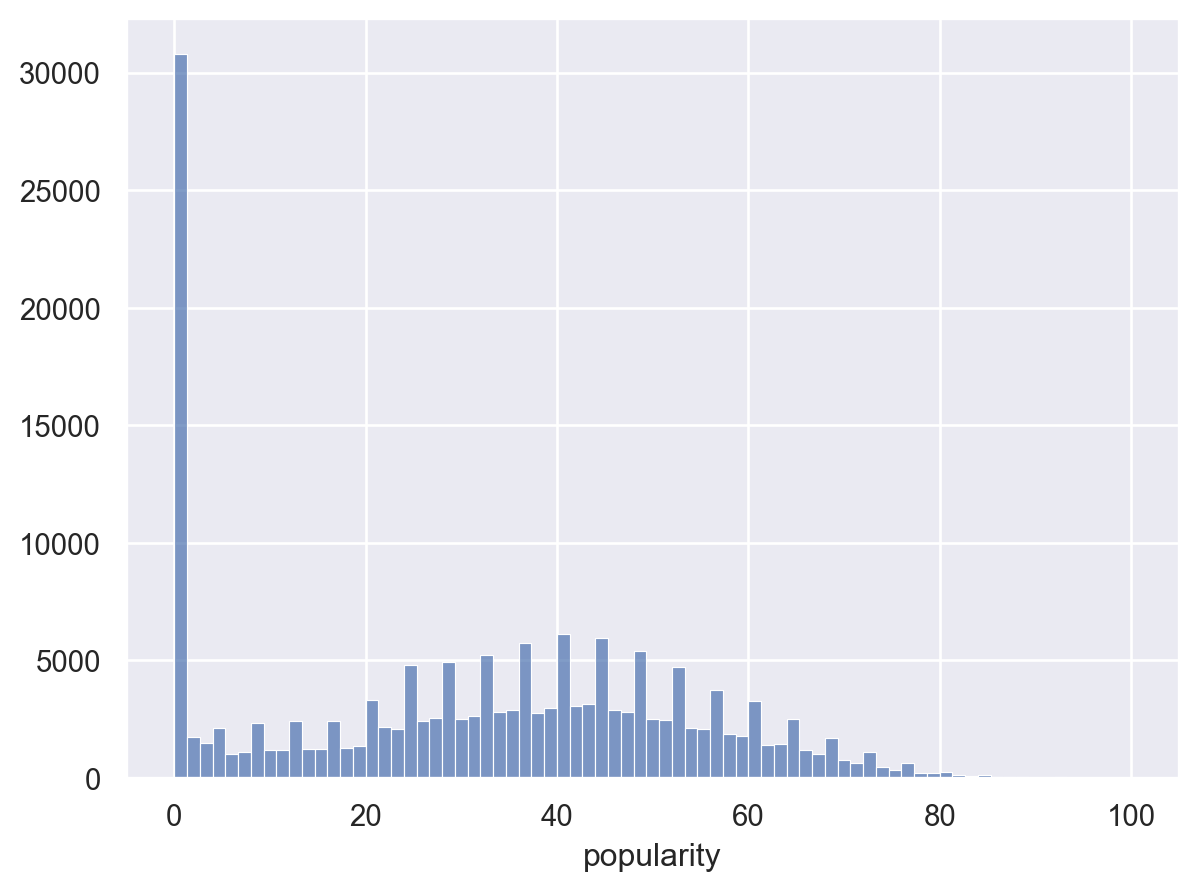

In [20]:
p = so.Plot(df, "popularity")
p.add(so.Bars(), so.Hist())

In [21]:
popularity_100 = df.loc[df["popularity"] == 100]
print(f' Number of songs with an "popularity" measure of 100: {popularity_100["id"].value_counts().sum()}')

popularity_0 = df.loc[df["popularity"] == 0]
print(f' Number of songs with an "popularity" measure of zero: {popularity_0["id"].value_counts().sum()}')

print('Mean "popularity" rating: 31.431794')

 Number of songs with an "popularity" measure of 100: 1
 Number of songs with an "popularity" measure of zero: 27892
Mean "popularity" rating: 31.431794


## Tempo

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [22]:
# Create the 'target' column using list comprehension
df['target'] = [1 if x > 50 else 0 for x in df['popularity']]
df.head(1)

valence  year  acousticness  \
0   0.0594  1921         0.982   

                                             artists  danceability  \
0  Sergei Rachmaninoff', 'James Levine', 'Berline...         0.279   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz             0.878   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   

   speechiness   tempo  target  
0       0.0366  80.954       0

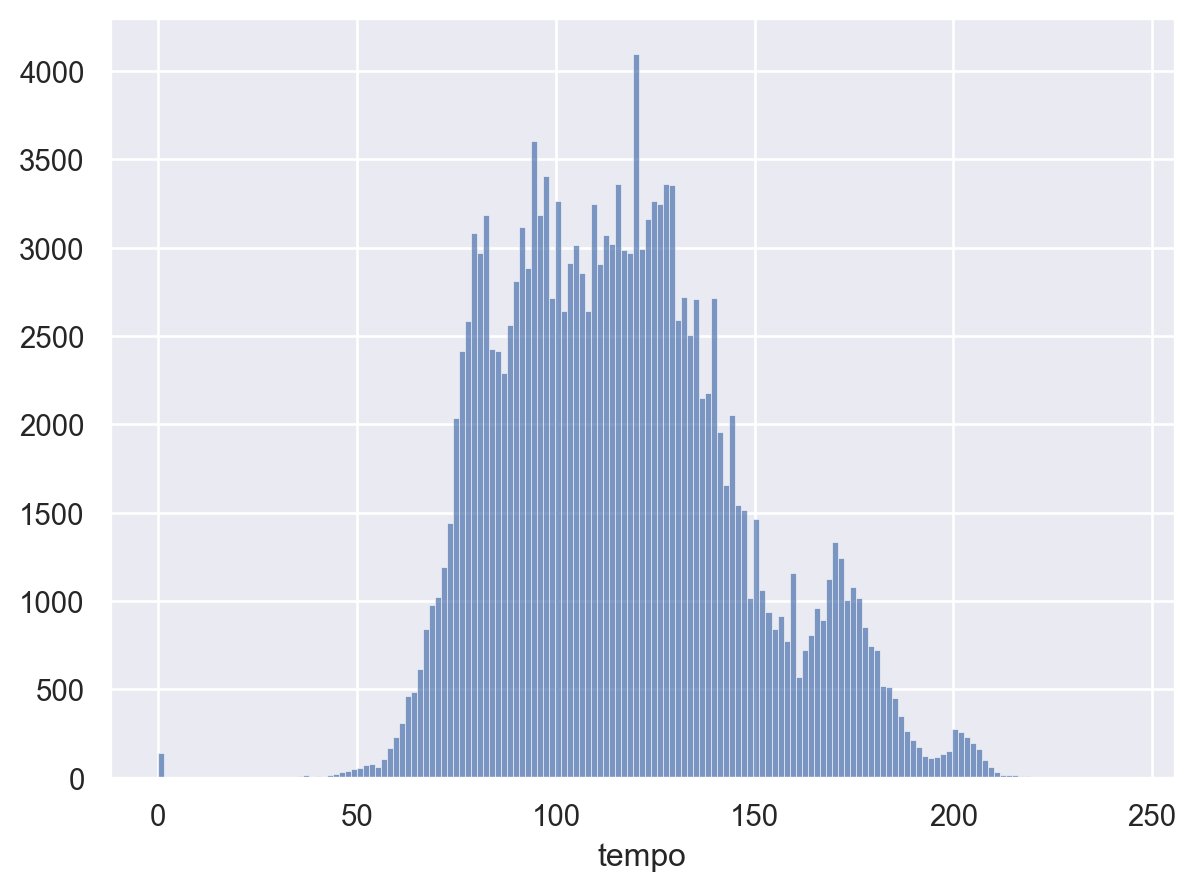

In [23]:
p = so.Plot(df, "tempo")
p.add(so.Bars(), so.Hist())     

## Speechiness

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

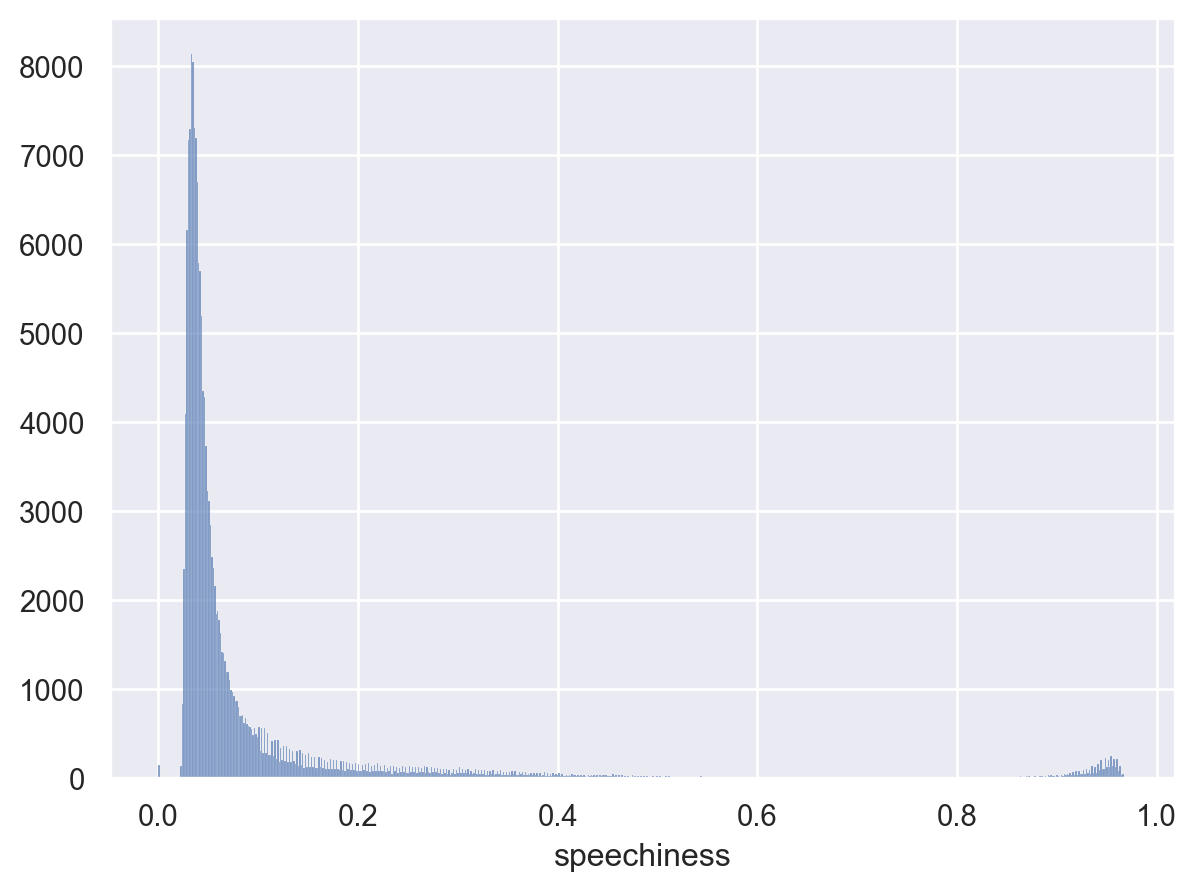

In [24]:
p = so.Plot(df, "speechiness")
p.add(so.Bars(), so.Hist())

In [25]:
df["release_date"].describe()

count     170653
unique     11244
top         1945
freq        1446
Name: release_date, dtype: object

## Mode

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

In [26]:
df["mode"].value_counts()

mode
1    120635
0     50018
Name: count, dtype: int64

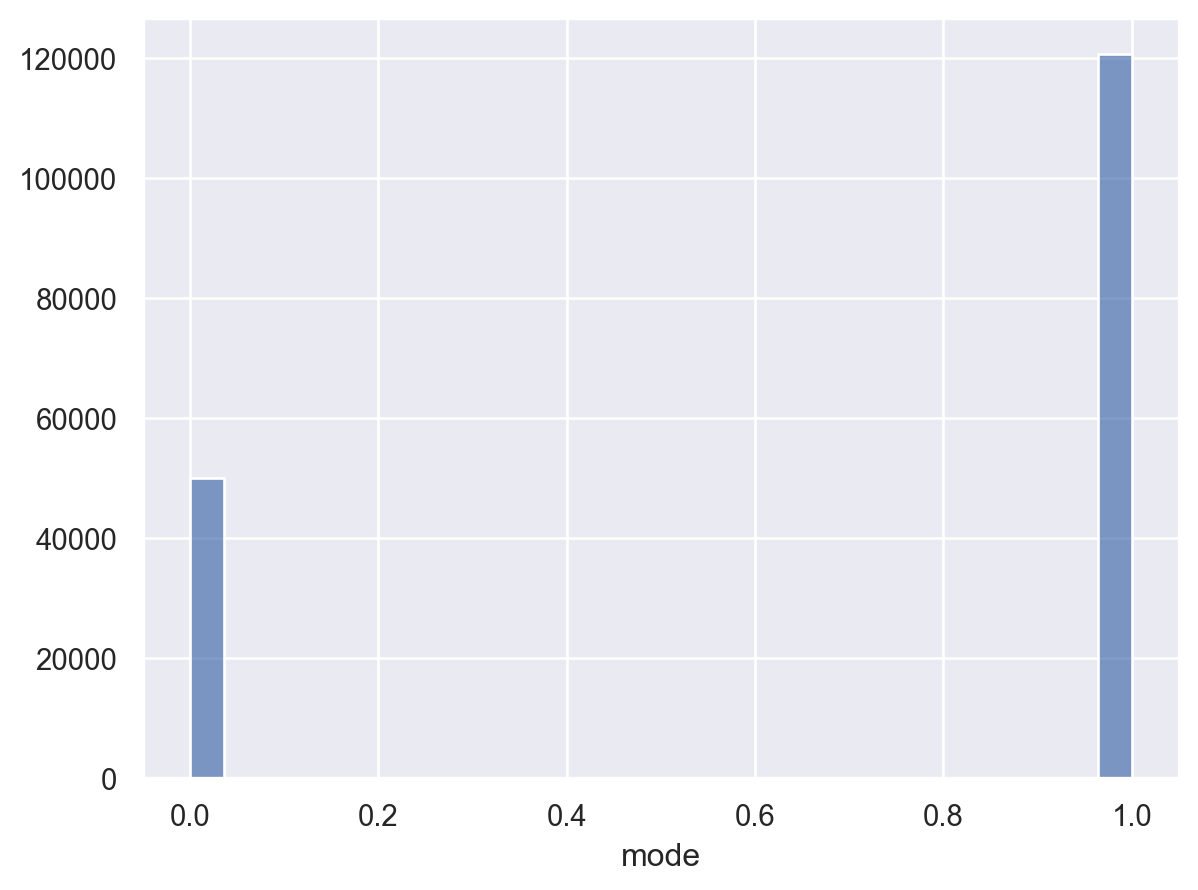

In [27]:
p = so.Plot(df, "mode")
p.add(so.Bars(), so.Hist())

## Loudness

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

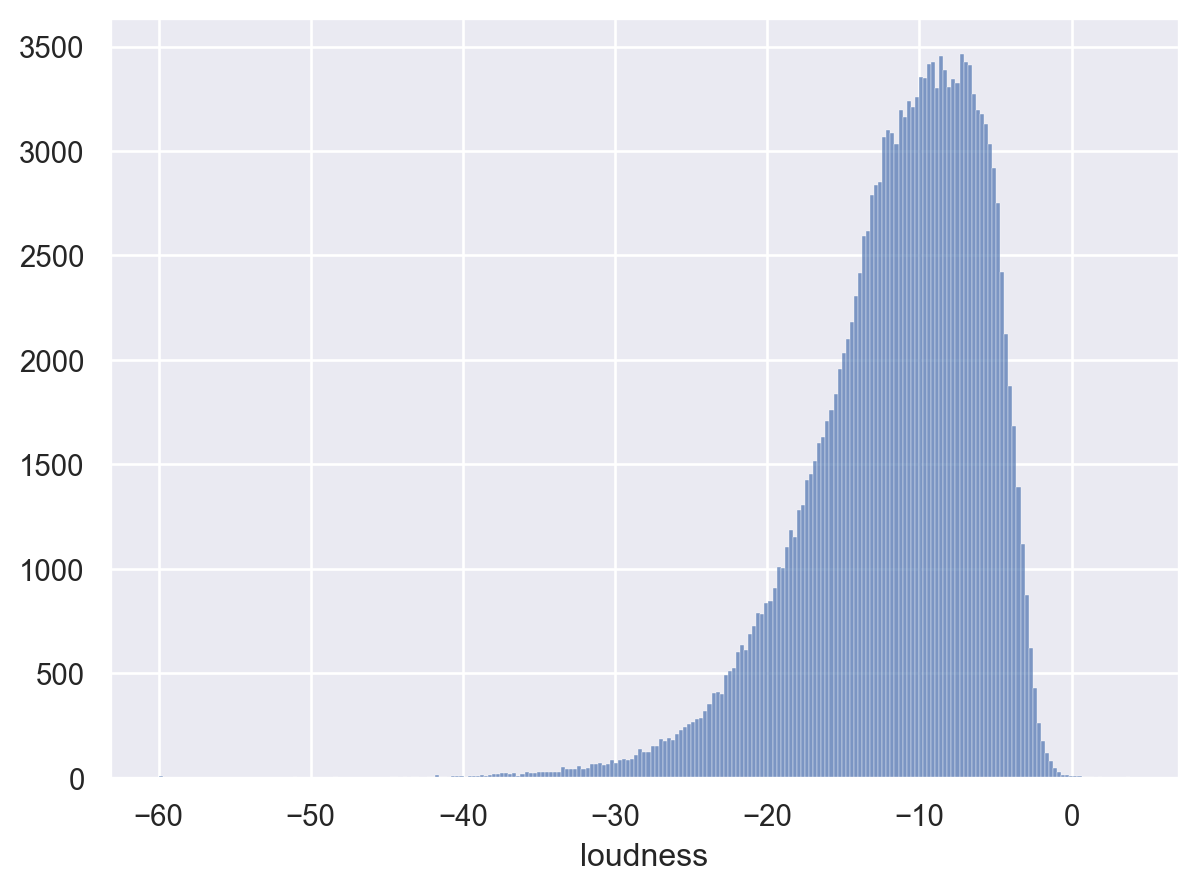

In [28]:
p = so.Plot(df, "loudness")
p.add(so.Bars(), so.Hist())

## Liveness

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

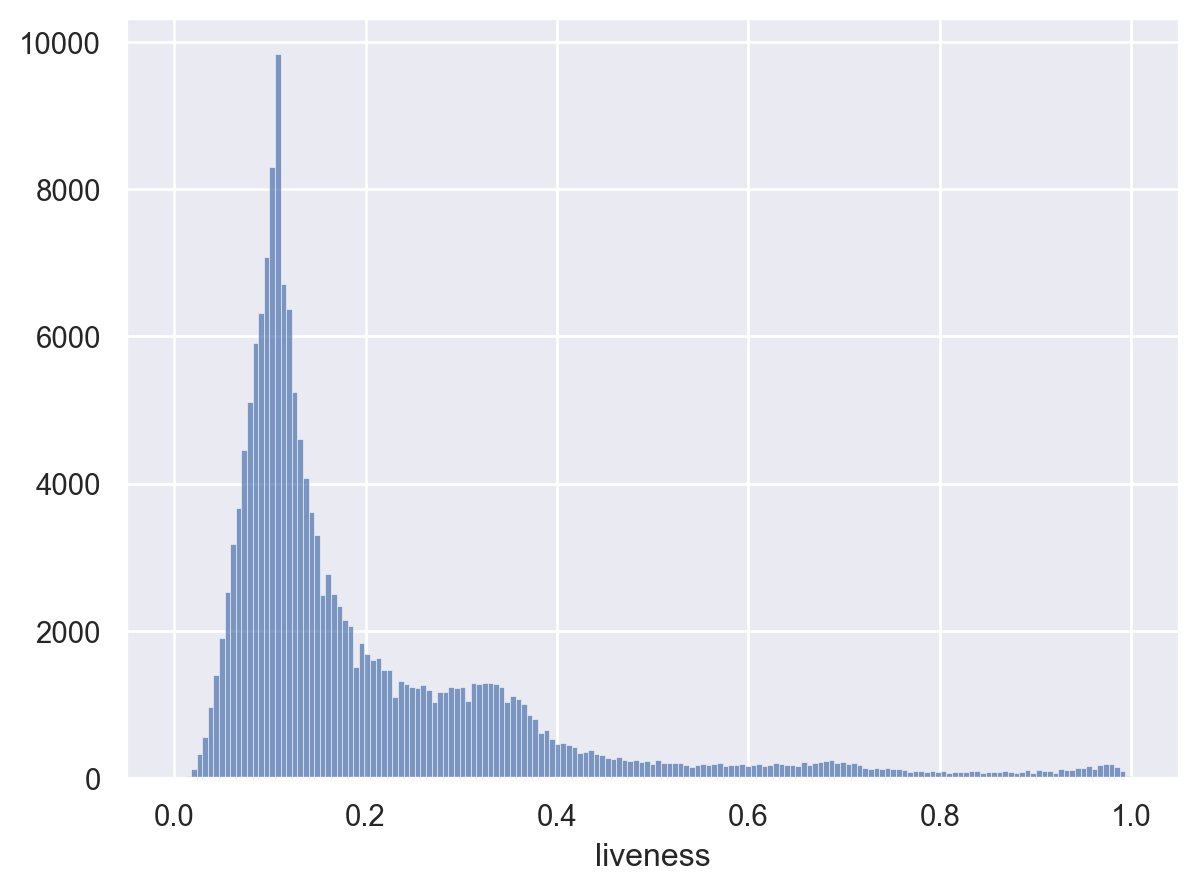

In [29]:
p = so.Plot(df, "liveness")
p.add(so.Bars(), so.Hist())

## Explicit

A marker of whether or not a song is explicit, presumably 0 meaning the song is not explicit, and 1 meaning a song is explicit. 

In [30]:
df["explicit"].value_counts()

explicit
0    156220
1     14433
Name: count, dtype: int64

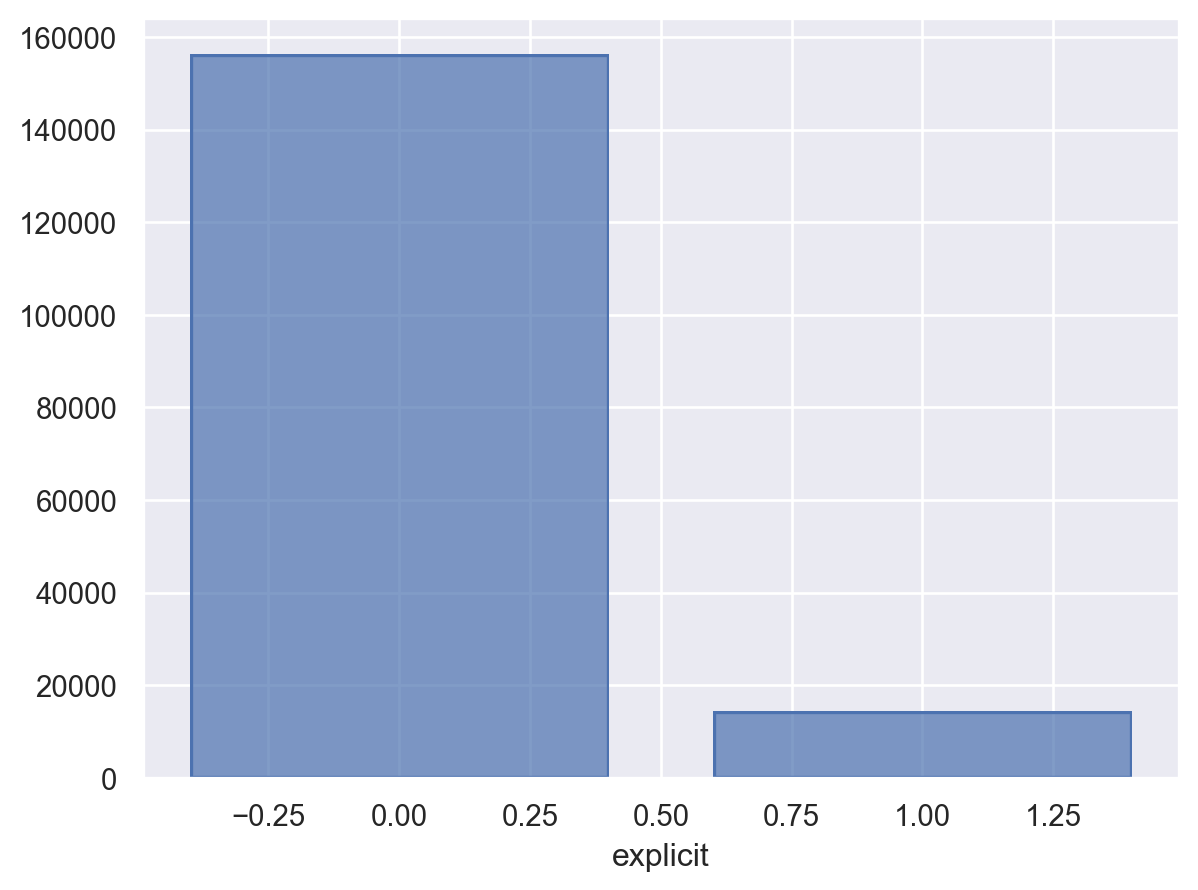

In [31]:
explicit = df["explicit"].value_counts()
so.Plot(x=explicit.index, y=explicit.values).add(so.Bar())

## Key

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

This is an int but it represents a string so let's change it to not get confused

In [32]:
keys_dict = {0:'C', 1:'C#/Db', 2:'D', 3:'D#/Eb', 4:'E', 5:'F', 6:'F#/Gb', 7:'G', 8:'G#/Ab', 9:'A', 10:'A#/Bb', 11:'B'}
df['key'] = df['key'].map(keys_dict)
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  Sergei Rachmaninoff', 'James Levine', 'Berline...         0.279   
1                                         Dennis Day         0.819   
2  KHP Kridhamardawa Karaton Ngayogyakarta Hadini...         0.328   
3                                       Frank Parker         0.275   
4                                         Phil Regan         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

     key  liveness  loudness  mode  \
0  A#/Bb     0.665   -20.096     1   
1      G     0.160   -12.441     1   
2  D#/Eb     0.101   -14.850     1   
3      F     0.381    -9.316     1   
4  D#/Eb     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  target  
0       0.0366   80.954       0  
1       0.4150   60.936       0  
2       0.0339  110.339       0  
3       0.0354  100.109       0  
4       0.0380  101.665       0

In [33]:
df["key"]. info()

<class 'pandas.core.series.Series'>
RangeIndex: 170653 entries, 0 to 170652
Series name: key
Non-Null Count   Dtype 
--------------   ----- 
170653 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


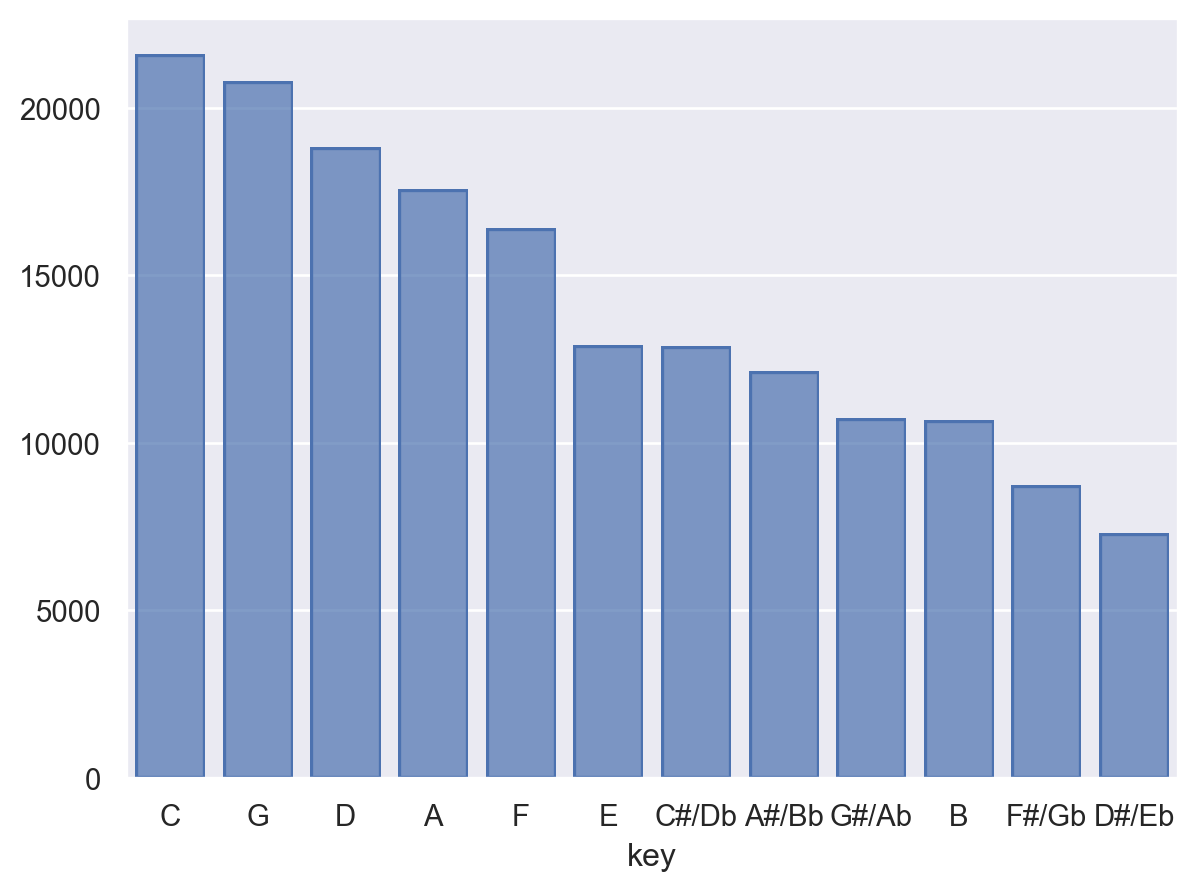

In [34]:
keys = df["key"].value_counts()
so.Plot(x=keys.index, y=keys.values).add(so.Bar())

# Model Preprocessing

In [35]:
# revisiting our dataset to see what features we have
df.head(1)

valence  year  acousticness  \
0   0.0594  1921         0.982   

                                             artists  danceability  \
0  Sergei Rachmaninoff', 'James Levine', 'Berline...         0.279   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz             0.878   

     key  liveness  loudness  mode  \
0  A#/Bb     0.665   -20.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   

   speechiness   tempo  target  
0       0.0366  80.954       0

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [37]:
# creating a column with the combined track name and artist name for ease of understanding
df["track_and_artist"] = df.apply(lambda row: f'{row["name"]} by {row["artists"]}', axis=1)
df['track_and_artist'].iloc[50]

"A Midsummer Night's Dream, Op. 61: Scherzo by Felix Mendelssohn', 'Arturo Toscanini"

In [38]:
# our X_train doesn't have the song name or artist, so we should add them back in to get recommendations

to_drop = ['popularity', 'release_date', 'target', 'id', 'name', 'artists', 'track_and_artist']

X = df.drop(labels= to_drop, axis=1)
y = df[['name', 'artists']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)

X_train.head()

valence  year  acousticness  danceability  duration_ms  energy  \
56597     0.205  2016       0.78200         0.411       220727   0.523   
5662      0.736  1950       0.94000         0.601       186293   0.146   
132863    0.166  1980       0.04140         0.396       250200   0.937   
115390    0.636  1972       0.00721         0.537       298867   0.904   
157939    0.206  1956       0.87600         0.176       188427   0.104   

        explicit  instrumentalness    key  liveness  loudness  mode  \
56597          1          0.000009      B    0.2930   -11.786     1   
5662           0          0.278000  D#/Eb    0.0699   -11.668     1   
132863         0          0.000606      F    0.8980    -6.707     1   
115390         0          0.000509      A    0.1260    -6.187     1   
157939         0          0.007750      G    0.1460   -18.377     0   

        speechiness    tempo  
56597        0.2410  144.738  
5662         0.0417  141.704  
132863       0.1070  131.407  
115390       0.0663  137.670  
157939       0.0380   71.477

In [39]:
y_train.head()

name  \
56597                                             Options   
5662                                    Bye Bye Blackbird   
132863                                      Devils Answer   
115390  Moonage Daydream - Sounds of the 70s - John Pe...   
157939                         What Good Am I Without You   

                                    artists  
56597                       Hippie Sabotage  
5662                            Dean Martin  
132863                       Atomic Rooster  
115390  David Bowie & The Spiders From Mars  
157939                        Jeri Southern

In [40]:
# isolating numeric and categorical features
numeric = ['valence', 'year', 'acousticness','energy', 'danceability', 'duration_ms', 'explicit', 'instrumentalness', 
              'liveness', 'loudness', 'mode', 'speechiness', 
             'tempo']
categorical = ['key']

# instantiate processors
ss = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

# TRAIN
train_numeric_transformed = ss.fit_transform(X_train[numeric])
train_cat_transformed = ohe.fit_transform(X_train[categorical])
# TEST
test_numeric_transformed = ss.transform(X_test[numeric])
test_cat_transformed = ohe.transform(X_test[categorical])


# Convert the sparse matrix to a dense numpy array
train_cat_transformed_dense = train_cat_transformed.toarray()
test_cat_transformed_dense = test_cat_transformed.toarray()

# Concatenate the transformed numeric and categorical features
X_train_processed = np.concatenate([train_numeric_transformed, train_cat_transformed_dense], axis=1)
X_test_processed = np.concatenate([test_numeric_transformed, test_cat_transformed_dense], axis=1)

# Song Similarity with Nearest Neighbors

We don't really have a target here, we're just looking at nearest neighbors and recommending neighbors 

For an evaluation metric, look into Mean Average Precision (MAP)????

"If your task involves ranking, such as recommendation systems, you can use Mean Average Precision (MAP) as an evaluation metric. MAP measures the average precision across different queries. For each query, you calculate the precision at each position in the list of recommended items and then average these precisions across all queries."

In [41]:
from sklearn.neighbors import NearestNeighbors

# instantiate neighbors
model_nn = NearestNeighbors(metric='cosine', algorithm='brute')
# fit to train
model_nn.fit(X_train_processed)

NearestNeighbors(algorithm='brute', metric='cosine')

In [42]:
# Make predictions
train_neighbors = model_nn.kneighbors(X_train_processed, n_neighbors = 6)
test_neighbors = model_nn.kneighbors(X_test_processed, n_neighbors = 6)
print(train_neighbors[0])

[[1.11022302e-16 9.65865480e-02 1.05328638e-01 1.10974035e-01
  1.14366071e-01 1.18059615e-01]
 [0.00000000e+00 2.17644627e-02 5.29043858e-02 5.40944634e-02
  5.62339359e-02 5.84898017e-02]
 [0.00000000e+00 2.30074285e-02 3.46418585e-02 4.12737625e-02
  4.21430003e-02 4.41051957e-02]
 ...
 [0.00000000e+00 1.40079028e-02 3.29310002e-02 3.40671671e-02
  3.63181671e-02 3.80295897e-02]
 [0.00000000e+00 4.01565721e-02 4.28034770e-02 5.34381868e-02
  5.95693971e-02 6.18494464e-02]
 [0.00000000e+00 1.58889610e-02 2.61597659e-02 2.68027241e-02
  2.87792470e-02 3.14824802e-02]]


In [43]:
# looking at just one
# Get the neighbors for the first item in X_test_processed
distances, indices = model_nn.kneighbors([X_test_processed[0]], n_neighbors=6)
print("Indices of Neighbors:", indices)
print("Distances to Neighbors:", distances)

Indices of Neighbors: [[106493  70952  59630   5444  99580  55103]]
Distances to Neighbors: [[0.02916527 0.06121498 0.0618236  0.07021745 0.0717615  0.07206031]]


In [44]:
neighbors_data = X_train.iloc[indices[0]].values  # .values to convert DataFrame to numpy array
test_instance = X_test_processed[0]

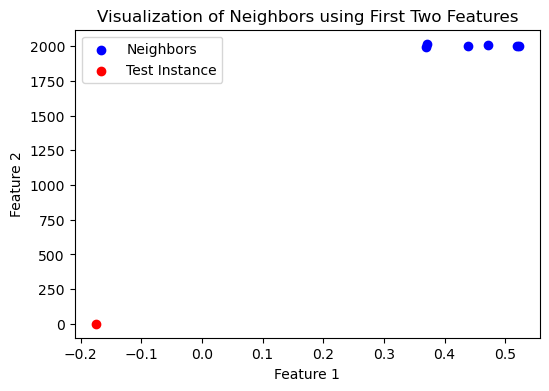

In [45]:
# Plot the first two features
plt.figure(figsize=(6, 4))
plt.scatter(neighbors_data[:, 0], neighbors_data[:, 1], c='blue', label='Neighbors')
plt.scatter(test_instance[0], test_instance[1], c='red', label='Test Instance')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of Neighbors using First Two Features')
plt.show()

# Baseline Recommendation system
this part of the code was adapted from https://beckernick.github.io/music_recommender/
 
 After randomly selecting query_index, we retrieve the actual index (song name and artist) corresponding to that index from the original training set X_train2. Then, we use this actual index in the print statement to display the recommendations along with their actual index.

 Using this system, we are limited to only the songs that were present in our training set. Additionally, this generates a random song with its recommendations, without user input. 

In [46]:
query_index = np.random.choice(len(X_train_processed))
distances, indices = model_nn.kneighbors(X_train_processed[query_index].reshape(1, -1), n_neighbors=6)

# Get the actual index (song name and artist) from X_train2
actual_index = y_train.index[query_index]
actual_song_name = y_train.loc[actual_index, 'name']
actual_artist_name = y_train.loc[actual_index, 'artists']

print('Recommendations similar to {0} by {1}:\n'.format(actual_song_name, actual_artist_name))

for i in range(1, len(distances.flatten())):
    recommended_index = y_train.index[indices.flatten()[i]]
    recommended_song_name = y_train.loc[recommended_index, 'name']
    recommended_artist_name = y_train.loc[recommended_index, 'artists']
    print('{0}: {1} by {2}, with distance of {3}'.format(i, recommended_song_name, recommended_artist_name, distances.flatten()[i]))


Recommendations similar to Mr. Wonderful by Peggy Lee', 'Sy Oliver & His Orchestra:

1: Devuelveme Mis Besos by Nicolas Urcelay, with distance of 0.014421545792193902
2: If Love Were All - Live At Carnegie Hall/1961 by Judy Garland, with distance of 0.03158637378710605
3: Pelléas et Mélisande, L.88 / Act 4: "C'est le dernier soir" by Claude Debussy', 'Pierre Mollet', 'Suzanne Danco', "L'Orchestre de la Suisse Romande", 'Ernest Ansermet, with distance of 0.031696516530560936
4: Imagination - 78rpm Version by Doris Day, with distance of 0.03298461446268042
5: Imagination - 78rpm Version by Doris Day, with distance of 0.03298461446268042


# FOR LATER - Uploading spotify urls for 30 - second previews if I have time to figure it out

In [47]:
''' looking to see if we can get 30-second preview clips of each song 
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

def get_audio_preview(uri):
    client_credentials_manager = SpotifyClientCredentials(client_id='insert_here',
                                                          client_secret='insert_here')
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    
    track_id = uri.split(':')[-1]
    track_info = sp.track(track_id)
    
    audio_preview_url = track_info['preview_url']
    return audio_preview_url
    '''

" looking to see if we can get 30-second preview clips of each song \nimport spotipy\nfrom spotipy.oauth2 import SpotifyClientCredentials\n\ndef get_audio_preview(uri):\n    client_credentials_manager = SpotifyClientCredentials(client_id='insert_here',\n                                                          client_secret='insert_here')\n    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)\n    \n    track_id = uri.split(':')[-1]\n    track_info = sp.track(track_id)\n    \n    audio_preview_url = track_info['preview_url']\n    return audio_preview_url\n    "

In [48]:
'''# testing out getting the urls
audio_preview_url = get_audio_preview('spotify:track:5uCax9HTNlzGybIStD3vDh')
audio_preview_url'''

"# testing out getting the urls\naudio_preview_url = get_audio_preview('spotify:track:5uCax9HTNlzGybIStD3vDh')\naudio_preview_url"

# K Means clustering

https://medium.com/@david.de.hernandez/modeling-data-for-a-spotify-recommender-system-3056997a0fc5

^^ taking some inspo from this article


In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [50]:
# Setup grid for search
kmeans = KMeans(random_state=27)
params = {'n_clusters': [5, 10, 20]}

# Instantiate grid search object
grid_kmeans = GridSearchCV(estimator=kmeans, param_grid=params, cv=5)

# Fit and get best model
grid_kmeans.fit(X_train_processed) 
best_estimator = grid_kmeans.best_estimator_

print(grid_kmeans.best_params_)

{'n_clusters': 20}


In [53]:
kmeans = KMeans(n_clusters=20, random_state=27)

clusters_train = kmeans.fit_predict(X_train_processed)

# Predict clusters for the test set
clusters_test = kmeans.predict(X_test_processed)

# Calculate silhouette score for both training and test sets
silhouette_score_train = metrics.silhouette_score(X_train_processed, clusters_train)
silhouette_score_test = metrics.silhouette_score(X_test_processed, clusters_test)
ch_score_train = metrics.calinski_harabasz_score(X_train_processed, clusters_train)
ch_score_test = metrics.calinski_harabasz_score(X_test_processed, clusters_test)
                                                 

print("Silhouette Score (Train):", silhouette_score_train)
print("Silhouette Score (Test):", silhouette_score_test)
print("Calinski Harabasz Score (Train):", ch_score_train)
print("Calinski Harabasz Score (Test):", ch_score_test)

Silhouette Score (Train): 0.12066455020957727
Silhouette Score (Test): 0.12140075234786236
Calinski Harabasz Score (Train): 9627.683912138973
Calinski Harabasz Score (Test): 3230.0135850346496


Silhouette scores are low

from Sklearn: 
"If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared)"


" If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster."

In [63]:
# Create a DataFrame with the cluster labels
cluster_df1 = pd.DataFrame(clusters_train, columns=['cluster'])
cluster_df1.head()

cluster
0       14
1       15
2       11
3        0
4        6

In [64]:
cluster_values = cluster_df1['cluster'].value_counts(ascending=False)
cluster_values

cluster
2     14961
15    11463
1      9526
9      9448
6      9053
13     8676
10     8101
0      7584
3      7097
12     6746
19     6599
11     5870
18     5173
7      4165
16     3608
4      3443
17     2002
5      1924
14     1824
8       726
Name: count, dtype: int64

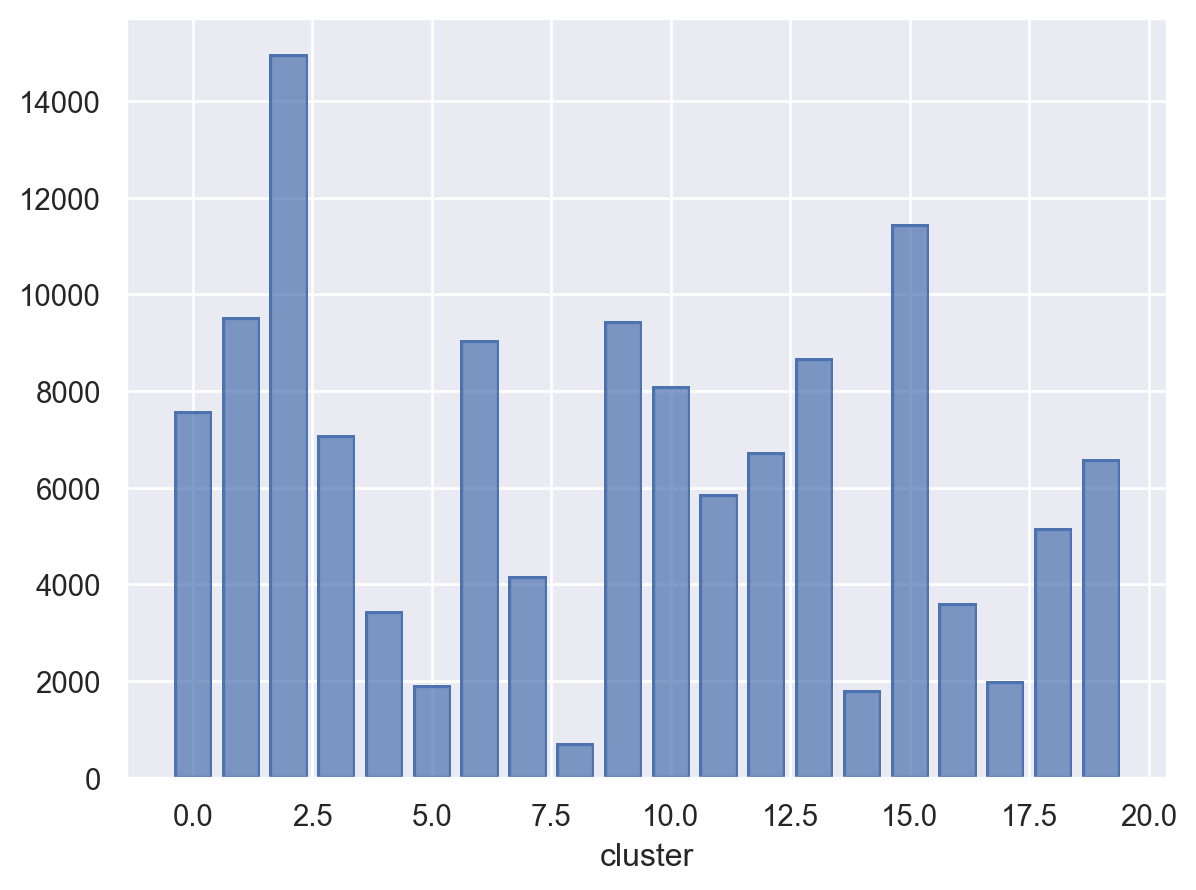

In [56]:
so.Plot(x=cluster_values.index, y=cluster_values.values).add(so.Bar())

In [57]:
X_train.reset_index(inplace=True)
X_train.head()

index  valence  year  acousticness  danceability  duration_ms  energy  \
0   56597    0.205  2016       0.78200         0.411       220727   0.523   
1    5662    0.736  1950       0.94000         0.601       186293   0.146   
2  132863    0.166  1980       0.04140         0.396       250200   0.937   
3  115390    0.636  1972       0.00721         0.537       298867   0.904   
4  157939    0.206  1956       0.87600         0.176       188427   0.104   

   explicit  instrumentalness    key  liveness  loudness  mode  speechiness  \
0         1          0.000009      B    0.2930   -11.786     1       0.2410   
1         0          0.278000  D#/Eb    0.0699   -11.668     1       0.0417   
2         0          0.000606      F    0.8980    -6.707     1       0.1070   
3         0          0.000509      A    0.1260    -6.187     1       0.0663   
4         0          0.007750      G    0.1460   -18.377     0       0.0380   

     tempo  
0  144.738  
1  141.704  
2  131.407  
3  137.670  
4   71.477

In [78]:
# joins automatically on index
X_train_cluster = X_train.join(cluster_df1['cluster'])
X_train_cluster.head()

index  valence  year  acousticness  danceability  duration_ms  energy  \
0   56597    0.205  2016       0.78200         0.411       220727   0.523   
1    5662    0.736  1950       0.94000         0.601       186293   0.146   
2  132863    0.166  1980       0.04140         0.396       250200   0.937   
3  115390    0.636  1972       0.00721         0.537       298867   0.904   
4  157939    0.206  1956       0.87600         0.176       188427   0.104   

   explicit  instrumentalness    key  liveness  loudness  mode  speechiness  \
0         1          0.000009      B    0.2930   -11.786     1       0.2410   
1         0          0.278000  D#/Eb    0.0699   -11.668     1       0.0417   
2         0          0.000606      F    0.8980    -6.707     1       0.1070   
3         0          0.000509      A    0.1260    -6.187     1       0.0663   
4         0          0.007750      G    0.1460   -18.377     0       0.0380   

     tempo  cluster  
0  144.738       14  
1  141.704       15  
2  131.407       11  
3  137.670        0  
4   71.477        6

In [65]:
cluster_df = X_train_cluster.join(y_train)
cluster_df.head()

index  valence  year  acousticness  danceability  duration_ms  energy  \
0   56597    0.205  2016       0.78200         0.411       220727   0.523   
1    5662    0.736  1950       0.94000         0.601       186293   0.146   
2  132863    0.166  1980       0.04140         0.396       250200   0.937   
3  115390    0.636  1972       0.00721         0.537       298867   0.904   
4  157939    0.206  1956       0.87600         0.176       188427   0.104   

   explicit  instrumentalness    key  liveness  loudness  mode  speechiness  \
0         1          0.000009      B    0.2930   -11.786     1       0.2410   
1         0          0.278000  D#/Eb    0.0699   -11.668     1       0.0417   
2         0          0.000606      F    0.8980    -6.707     1       0.1070   
3         0          0.000509      A    0.1260    -6.187     1       0.0663   
4         0          0.007750      G    0.1460   -18.377     0       0.0380   

     tempo  cluster                     name  \
0  144.738       14                      NaN   
1  141.704       15  Clancy Lowered the Boom   
2  131.407       11                Gati Bali   
3  137.670        0                Danny Boy   
4   71.477        6                      NaN   

                                             artists  
0                                                NaN  
1                                         Dennis Day  
2  KHP Kridhamardawa Karaton Ngayogyakarta Hadini...  
3                                       Frank Parker  
4                                                NaN

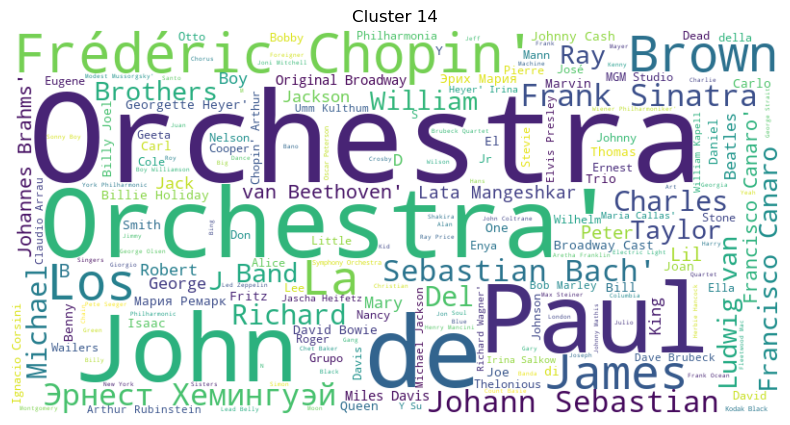

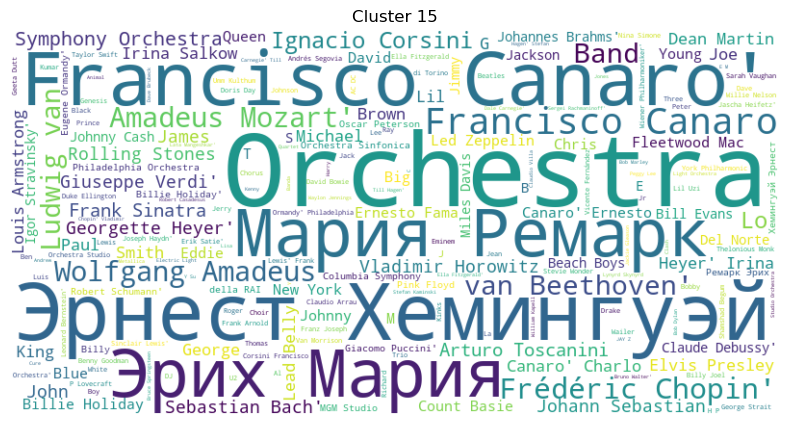

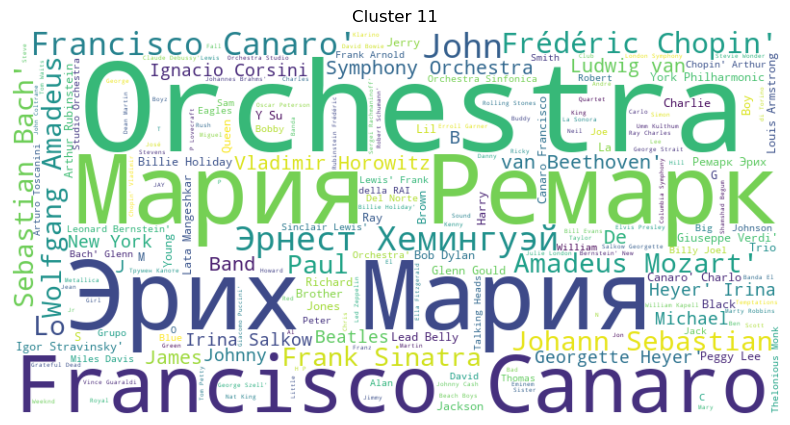

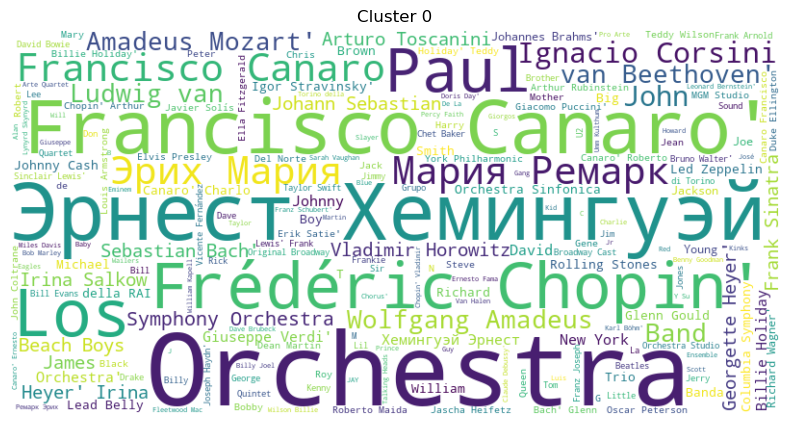

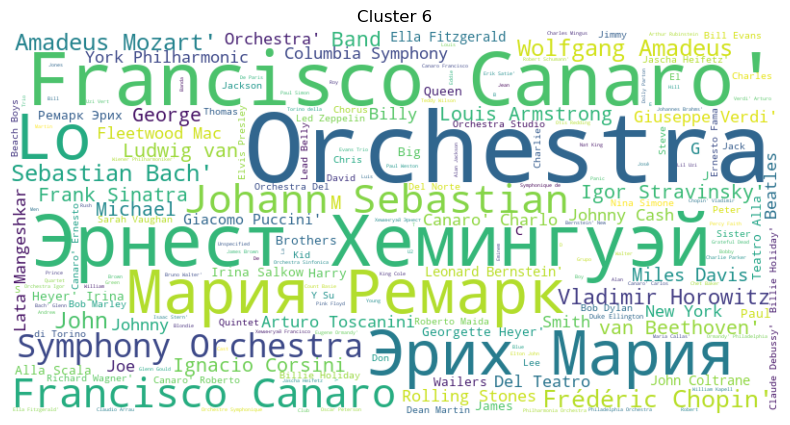

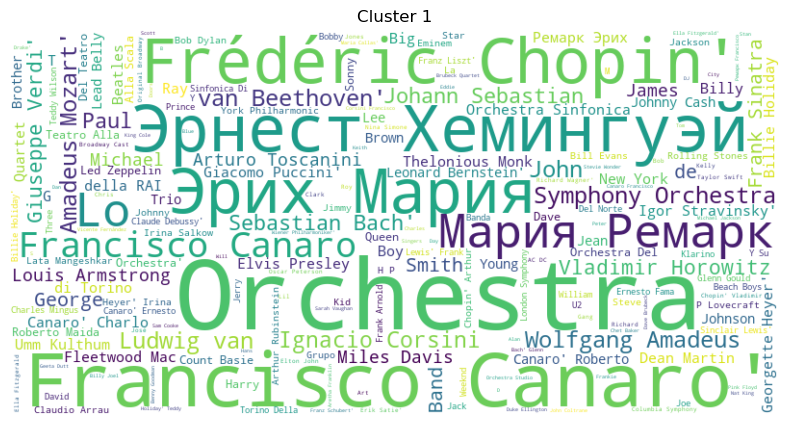

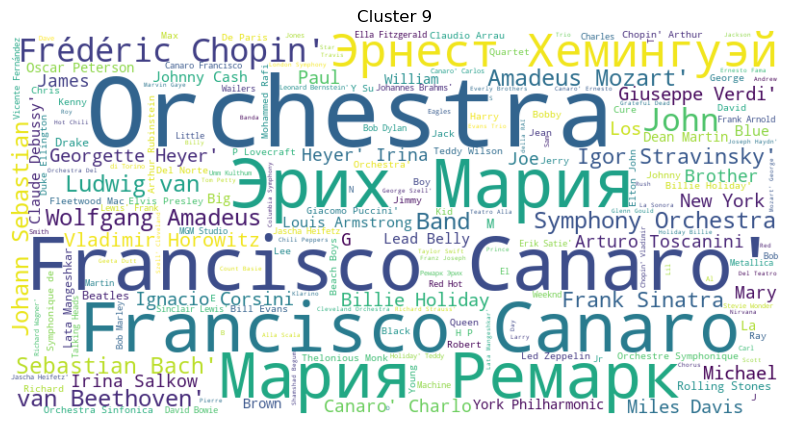

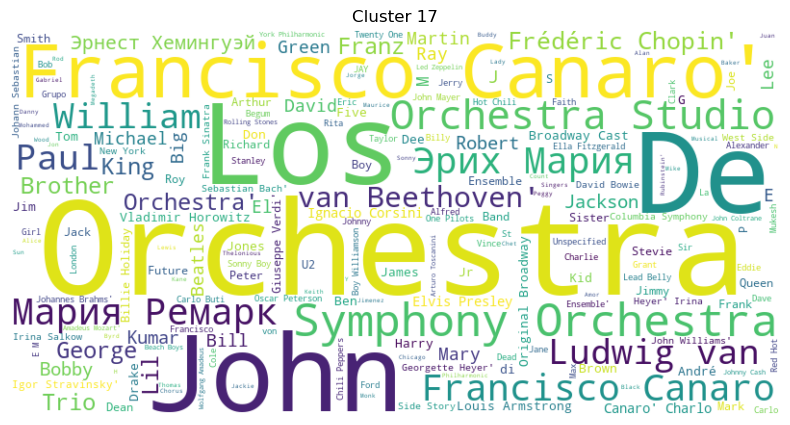

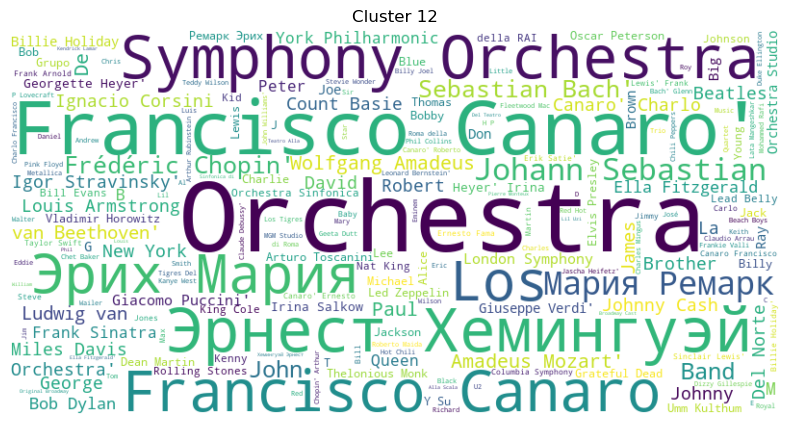

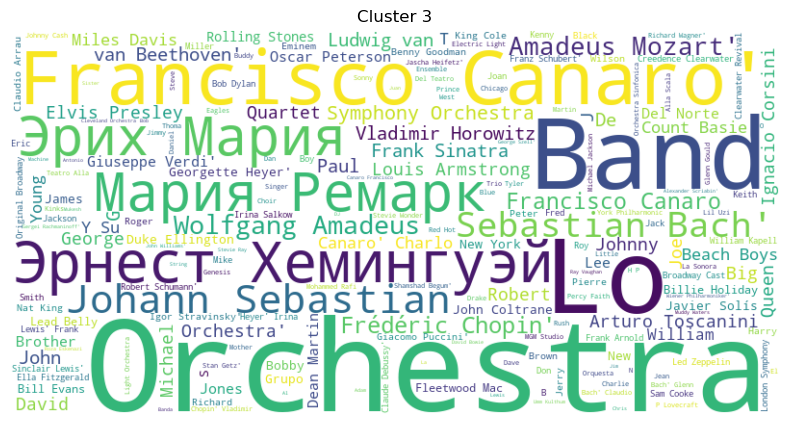

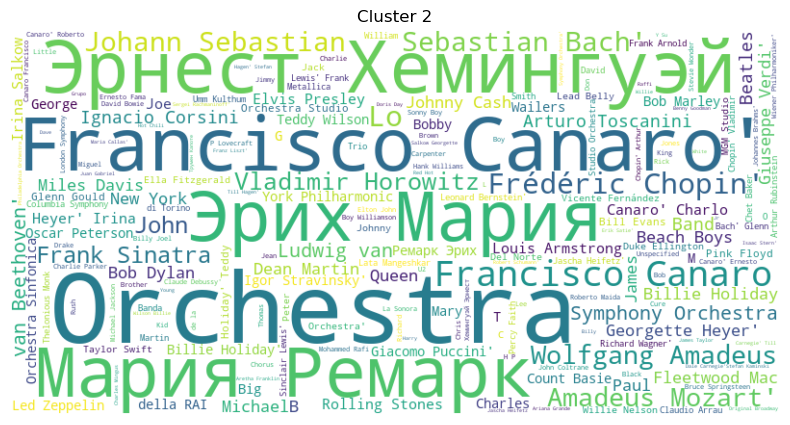

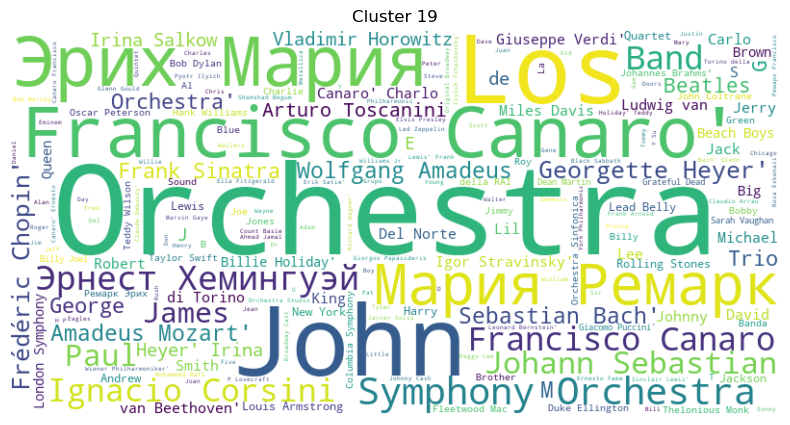

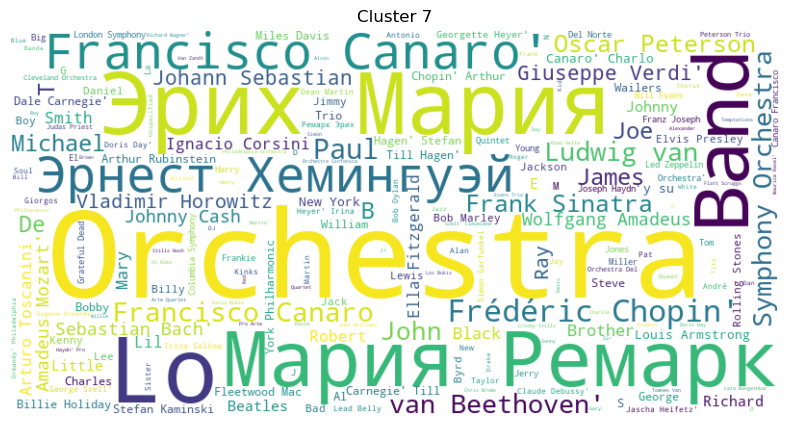

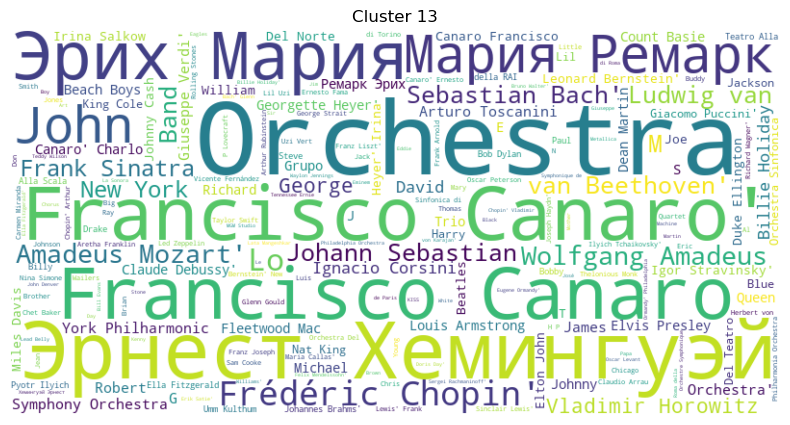

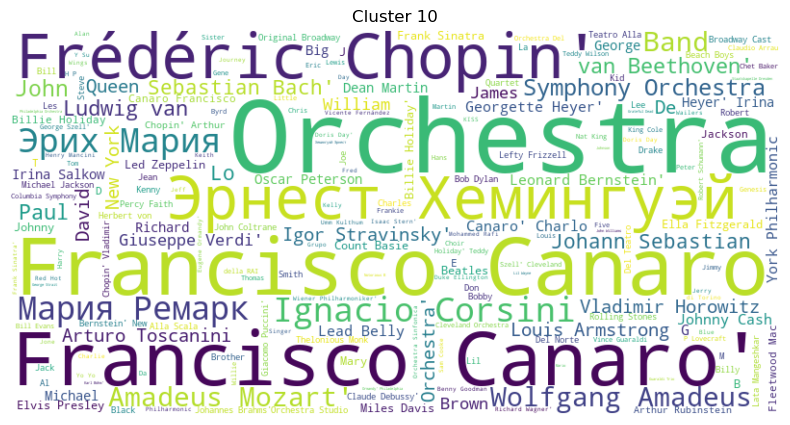

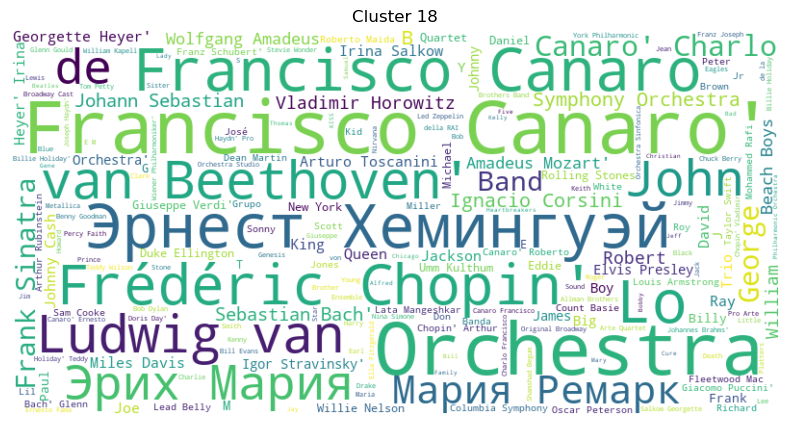

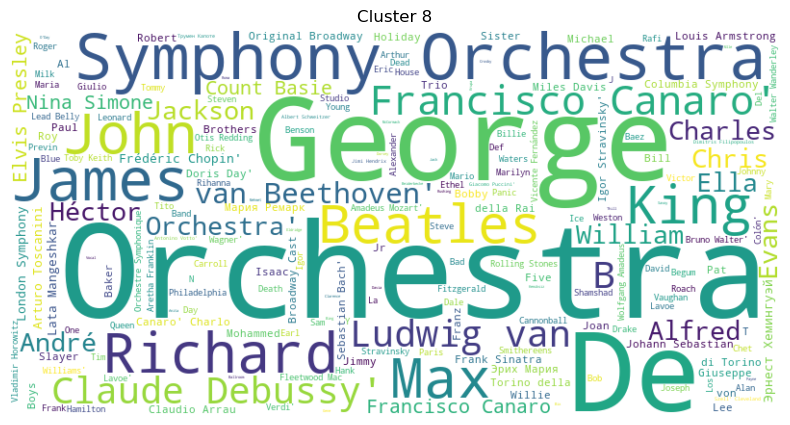

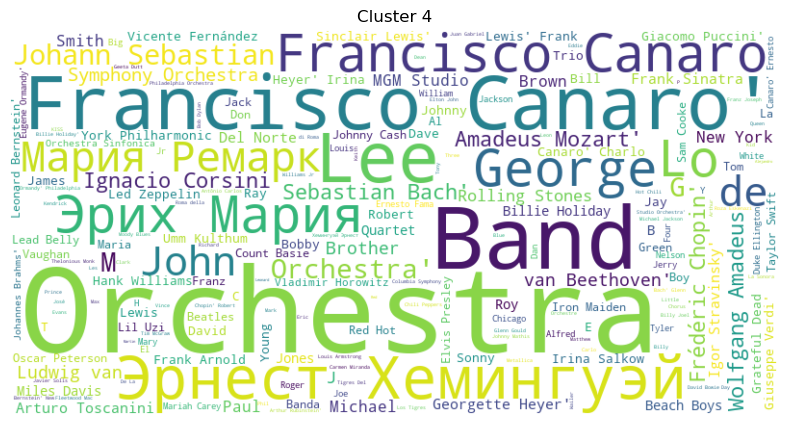

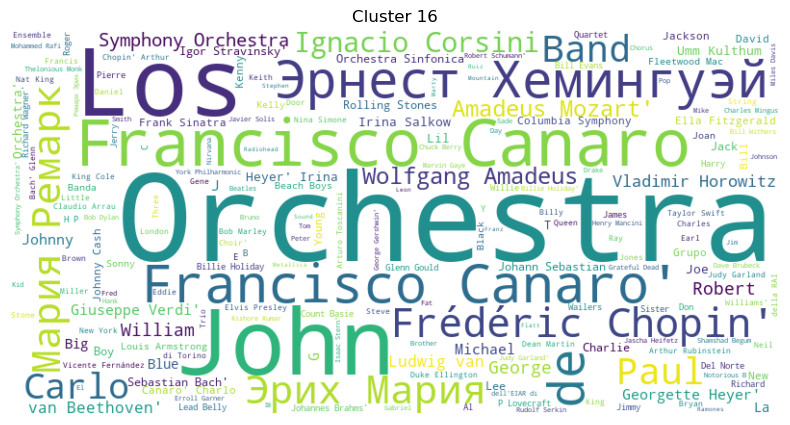

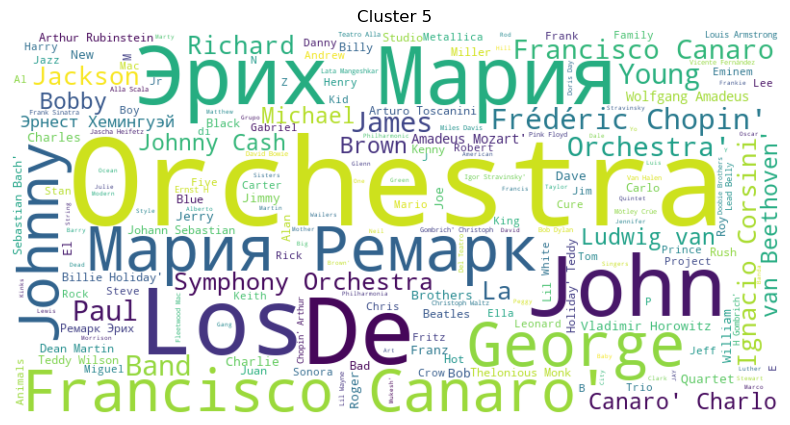

In [68]:
from wordcloud import WordCloud
from nltk import bigrams
from collections import Counter

# Function to generate and display a word cloud for each cluster
def generate_word_clouds(df):
    clusters = cluster_df['cluster'].unique()
    
    for cluster in clusters:
        artists = cluster_df[cluster_df['cluster'] == cluster]['artists']
        # Ensure all genres are strings and handle NaN values
        artists = artists.fillna('').astype(str)
        text = ' '.join(artists)
        
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Cluster {cluster}')
        plt.show()

# Generate the word clouds
generate_word_clouds(cluster_df)

# this is adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

In [69]:
from sklearn.decomposition import PCA


# reduce features to 2 using PCA in order to visualize
reduced_data = PCA(n_components=2, random_state = 27).fit_transform(X_train_processed)
kmeans_reduced = KMeans(init="k-means++", n_clusters=20, n_init=4)
kmeans_reduced.fit(reduced_data)
clusters_pca = kmeans_reduced.predict(reduced_data)
clusters_pca

array([ 3, 19,  7, ..., 10,  5,  6], dtype=int32)

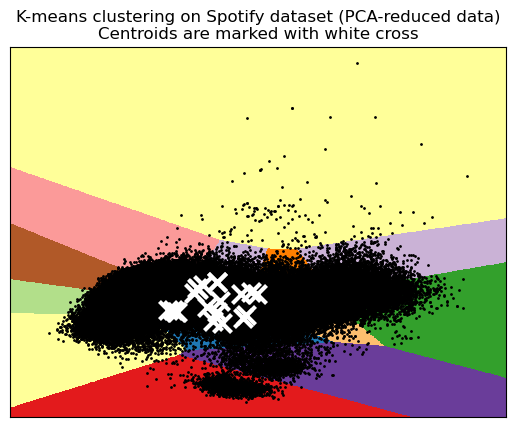

In [76]:
# Step size of the mesh. Decrease to increase the quality of the VQ.

h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_reduced.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on Spotify dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In the code snippet you provided, ravel is a method used in NumPy arrays. Specifically, ravel is used to flatten multi-dimensional arrays into a contiguous flattened array.

Here's what it does:

For a 2D array, like the one created by np.c_[xx.ravel(), yy.ravel()], ravel flattens the array by concatenating the rows of the array one after another.
If the original array has a shape of (m, n), the flattened array will have a shape of (m * n,).
In your code:

python
Copy code
pca_predict = kmeans_reduced.predict(np.c_[xx.ravel(), yy.ravel()])
xx and yy are likely 2D arrays representing coordinates for a mesh grid (possibly for visualizing clusters in a 2D space). np.c_ is used to concatenate them column-wise. Then, ravel flattens this concatenated array into a 1D array, which is passed to the predict method of the kmeans_reduced object.

This is often used in visualization tasks where you want to predict the cluster labels for each point in a mesh grid to plot decision boundaries or cluster regions.

In [77]:
# Calculate silhouette score for both training and test sets
silhouette_score_pca = metrics.silhouette_score(reduced_data, clusters_pca)
ch_score_pca = metrics.calinski_harabasz_score(reduced_data, clusters_pca)
                                                 

print("Silhouette Score:", silhouette_score_pca)
print("Calinski Harabasz Score:", ch_score_pca)

Silhouette Score: 0.324207046410983
Calinski Harabasz Score: 103586.69234406188
